<font size = 5><b><center>Trader Influencers Stream</font>
<ul>
<font size = 3>
<a href = "#section1"><li>1. Simple EDAs</li></a>
    <a href = "#section1.1"><ul><li>1.1 General Information of the dataset</li></ul></a>
    <a href = "#section1.2"><ul><li>1.2 Twitter Accounts' Information</li></ul></a>
    <a href = "#section1.3"><ul><li>1.3 Time series of tweet/retweet</li></ul></a>
<a href = "#section2"><li>2. Preprocessing the Dataset</li></a>
    <a href = "#section2.1"><ul><li>2.1 Consistent None types</li></ul></a>
    <a href = "#section2.2"><ul><li>2.2 Drop Unnecessary Columns</li></ul></a>
    <a href = "#section2.3"><ul><li>2.3 Extract all hashtags, symbols and  user_mentions</li></ul></a>
    <a href = "#section2.4"><ul><li>2.4  Clean text for LDA (Tokenize)</li></ul></a>
<a href = "#section3"><li>3. WordCloud</li></a>
    <a href = "#section3.1"><ul><li>3.1 Hashtag</li></ul></a>
    <a href = "#section3.2"><ul><li>3.2 Symbol</li></ul></a>
    <a href = "#section3.3"><ul><li>3.3 User_mentions</li></ul></a>
    <a href = "#section3.4"><ul><li>3.4 Hashtag and Symbol together</li></ul></a>
    <a href = "#section3.5"><ul><li>3.5 Clean text</li></ul></a>
<a href = "#section4"><li>4 Sentiment analysis</li></a>
    <a href = "#section4.1"><ul><li>4.1 Vader</li></ul></a>
    <a href = "#section4.2"><ul><li>4.2 Textblob</li></ul></a>
    <a href = "#section4.3"><ul><li>4.3 Flair</li></ul></a>
    <a href = "#section4.4"><ul><li>4.4 Sentiment packages comparison, distribution, and correlation </li></ul></a>
    <a href = "#section4.5"><ul><li>4.5 Time series of sentiment</li></ul></a>
<a href = "#section5"><li> 5. LDA</li></a>
    <a href = "#section5.1"><ul><li>5.1 Lemmatization</li></ul></a>
<a href = "#section6"><li> 6. Affect Analysis (extra)</li></a>
    
</ul>

<font color='##4682B4' size = 3>Pool dataset into jupyter notebook from Google SQL, credential file is named macrox.json. <br>
    All seven streams are included in the tables list, this file will focus on Trader Influencers dataset only </font>

In [1]:
#pip install gcsfs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

import re,string #deal with special characteristics in hashtag and text

import datetime
from timeit import default_timer as timer    

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'macrox.json'

tables = ['twitter_stream_macro_institutions',
 'twitter_stream_econ_news',
 'twitter_stream_investment_communities',
 'twitter_stream_us_politicians',
 'twitter_stream_federal_reserve',
 'twitter_stream_india_covid',
 'twitter_stream_trader_influencers']

In [3]:
df = pd.read_csv('gs://capstone_twitter/capstone/' + tables[6] + '.csv', index_col= 0)

<font size = 5><b><center><a id="section1">1. Simple EDAs</a>

<font color='#008080' size = 4><b><center><a id="section1.1">1.1 General Information</a>

In [4]:
df.head()

,status_id,created_at,user_screen_name,user_id,followers,location,coordinates,is_retweet,retweet_count,text,topic,hashtags,symbols,user_mentions,urls
0,1417364080533274625,2021-07-20 06:01:44,sogrand46866232,1415620489339277313,0,None,None,False,0,"@paulkrugman Hi guys, I would recommend a grea...",Trader-Influencers,None,None,"[{""screen_name"": ""paulkrugman"", ""name"": ""Paul ...","[{""url"": ""https://t.co/zTycFsdvv9"", ""expanded_..."
1,1417364878285807617,2021-07-20 06:04:55,wtfanother,1409182719863668745,7,None,None,False,0,@charliebilello don’t remind me,Trader-Influencers,None,None,"[{""screen_name"": ""charliebilello"", ""name"": ""Ch...",None
2,1417367179029188614,2021-07-20 06:14:03,EvWaugh91,1410864411594526720,6,New York,None,False,0,@profgalloway Why make everything political? W...,Trader-Influencers,None,None,"[{""screen_name"": ""profgalloway"", ""name"": ""Scot...",None
3,1418689535324610563,2021-07-23 21:48:37,TwitTomTwit,38369111,0,None,None,False,0,@paulkrugman Print 4 trillion in money and….vo...,Trader-Influencers,NaN,NaN,NaN,NaN
4,1417367949325729796,2021-07-20 06:17:07,RahulSi02050001,1140158377789575168,66,None,None,False,0,@charliebilello Now wait and see how majority ...,Trader-Influencers,None,None,"[{""screen_name"": ""charliebilello"", ""name"": ""Ch...",None


In [5]:
df.text[4]

'@charliebilello Now wait and see how majority of them grow. In that order..'

In [6]:
df.user_mentions[4]

'[{"screen_name": "charliebilello", "name": "Charlie Bilello", "id": 1413027896, "id_str": "1413027896", "indices": [0, 15]}]'

In [7]:
## total number of tweets in this dataset\
print("There are totally " + str(len(df)) + " Tweets in this dataset")


There are totally 88828 Tweets in this dataset


<font color='##4682B4' size = 3>See when twitter are sent in this dataset</font>

In [8]:
def time_frame(df_name):
    df_name_copy = df_name
    df_name_copy['created_at'] = df_name_copy['created_at'].astype('datetime64[ns]')

    print("\nLatest date of dataset:")
    print(df_name_copy.created_at.max())

    print("\nEarliest date of dataset:")
    print(df_name_copy.created_at.min())

    print("\nNumber of days between Latest and Earliest date of dataset:")
    print((df_name_copy.created_at.max() - df_name_copy.created_at.min()).days)

In [9]:
# time of when those tweets are being created
time_frame(df)


Latest date of dataset:
2021-10-01 16:00:23

Earliest date of dataset:
2021-06-19 16:30:50

Number of days between Latest and Earliest date of dataset:
103


<font color='#008080' size = 4><b><center><a id="section1.2">1.2 Accounts Information</a>

In [10]:
print("There are totally " + str(len(list(df['user_id'].unique()))) + " accounts in this dataset")

There are totally 51188 accounts in this dataset


In [11]:
df['tweets_Count'] = [1]* len(df)

In [12]:
df_f1 = df.groupby(['user_screen_name']).mean()

In [13]:
df_f2 = df.groupby(['user_screen_name']).sum()
df_f2 = df_f2.reset_index()

In [14]:
del df_f2['followers']

In [15]:
df_f2 = pd.merge(df_f2, df_f1['followers'], on = ['user_screen_name'])

In [150]:
def Account_info(df_f2, feature):
    df_f2.set_index(feature, inplace=True)
    df_f2.sort_index(inplace=True, ascending=False)
    df_f2.reset_index(feature, inplace=True)
    return df_f2[['user_screen_name','followers', 'retweet_count', 'tweets_Count']][:10]

<font color='##4682B4' size = 3>Top 10 accounts that have the most followers</font>

In [151]:
Account_info(df_f2, 'followers')

,user_screen_name,followers,retweet_count,tweets_Count
0,elonmusk,5.926437e+07,907.0,1.0
1,mcuban,8.508500e+06,0.0,1.0
2,paulkrugman,4.614354e+06,43772.0,416.0
3,cz_binance,3.051051e+06,0.0,1.0
4,kathygriffin,2.094973e+06,0.0,1.0
5,gtconway3d,1.803369e+06,0.0,1.0
6,BoredElonMusk,1.753451e+06,0.0,2.0
7,PreetBharara,1.732738e+06,1.0,4.0
8,jimcramer,1.731165e+06,4.0,1.0
9,sacca,1.652744e+06,1.0,3.0


<font color='##4682B4' size = 3>Top 10 accounts that have the most Retweets</font>

In [152]:
Account_info(df_f2, 'retweet_count')

,user_screen_name,followers,retweet_count,tweets_Count
0,paulkrugman,4.614354e+06,43772.0,416.0
1,charliebilello,2.954569e+05,16250.0,501.0
2,profgalloway,4.085344e+05,10316.0,999.0
3,LizAnnSonders,1.969388e+05,9225.0,1118.0
4,RayDalio,7.160335e+05,6746.0,346.0
5,morganhousel,2.915241e+05,6715.0,368.0
6,CathieDWood,1.064271e+06,5019.0,40.0
7,elerianm,4.031230e+05,4656.0,564.0
8,eWhispers,2.741054e+05,1813.0,120.0
9,chamath,1.533016e+06,1607.0,46.0


<font color='##4682B4' size = 3>10 Accounts that tweets the most</font>

In [153]:
Account_info(df_f2, 'tweets_Count')

,user_screen_name,followers,retweet_count,tweets_Count
0,LizAnnSonders,1.969388e+05,9225.0,1118.0
1,profgalloway,4.085344e+05,10316.0,999.0
2,MKucala,1.368561e+03,0.0,804.0
3,elerianm,4.031230e+05,4656.0,564.0
4,charliebilello,2.954569e+05,16250.0,501.0
5,paulkrugman,4.614354e+06,43772.0,416.0
6,morganhousel,2.915241e+05,6715.0,368.0
7,RayDalio,7.160335e+05,6746.0,346.0
8,JordanJamesEtem,1.459674e+04,15.0,276.0
9,emmetlsavage,1.439512e+04,20.0,148.0


<font color='#008080' size = 4><b><center><a id="section1.3">1.3 Time series of Tweet/Retweet</a>

In [19]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [20]:
df["Date"] = df['created_at'].dt.date
df_time_series = df.groupby(['Date']).sum()
df_time_series = df_time_series.reset_index()

In [21]:
df["Hour"] = df['created_at'].dt.hour
df_time_series2 = df.groupby(['Hour']).sum()
df_time_series2 = df_time_series2.reset_index()

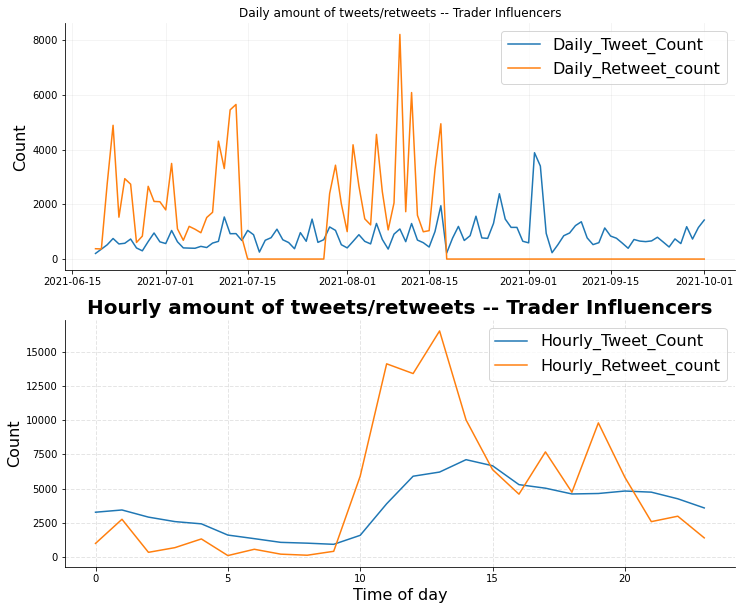

In [22]:
fig, ax = plt.subplots(2,1,figsize = (12,10))

ax[0].plot(df_time_series['Date'], df_time_series['tweets_Count'],'-',markersize=2, label='Daily_Tweet_Count')
ax[0].plot(df_time_series['Date'], df_time_series['retweet_count'],'-',markersize=2, label='Daily_Retweet_count')
ax[0].grid(color = 'grey', alpha =0.1)
ax[0].set_title(('Daily amount of tweets/retweets -- Trader Influencers'))
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].set_ylabel("Count", fontsize= 16)
ax[0].legend(prop={'size': 16})

ax[1].plot(df_time_series2['Hour'], df_time_series2['tweets_Count'],'-',markersize=2, label='Hourly_Tweet_Count')
ax[1].plot(df_time_series2['Hour'], df_time_series2['retweet_count'],'-',markersize=2, label='Hourly_Retweet_count')
ax[1].grid(color = 'grey', alpha =0.1)
ax[1].set_title(('Hourly amount of tweets/retweets -- Trader Influencers'),fontweight="bold", fontsize=20)
ax[1].grid(linestyle='--', linewidth='1', color = 'grey', alpha =0.2)
ax[1].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].set_xlabel("Time of day", fontsize=16)
ax[1].set_ylabel("Count", fontsize= 16)
ax[1].legend(prop={'size': 16})

# fig.savefig("Tweets_Time_Series", bbox_inches="tight")
plt.show() 

<font size = 5><b><center><a id="section2">2. Preprocessing the dataset</a>

<font color='#008080' size = 4><b><center><a id="section2.1">2.1 Consisting Data types and None types</a>

<font color='##4682B4' size = 3>A problem caused by inconsistence of missing data types, some of the missing data has empty values with string 'None' and others are missing values (nan), replace all None values with nan </font>

In [23]:
df.replace(to_replace=['None'], value=np.nan, inplace=True)

In [24]:
## check Nulls
df.isnull().sum(axis=0)

status_id               0
created_at              0
user_screen_name        0
user_id                 0
followers               0
location            39761
coordinates         88822
is_retweet              0
retweet_count           0
text                    0
topic                   0
hashtags            85511
symbols             85914
user_mentions        9703
urls                60178
tweets_Count            0
Date                    0
Hour                    0
dtype: int64

<font color='#008080' size = 4><b><center><a id="section2.2">2.2 Drop Unnecessary columns</a>

In [25]:
df = df.drop(columns = ['location'])

<font color='##4682B4' size = 3> Only 7 unique values in coordiantes, column does not contain much information, thus drop it</font>

In [26]:
len(df['coordinates'].unique())

7

In [27]:
df = df.drop(columns = ['coordinates'])

<font color='##4682B4' size = 3> The data indicates all is_retweet is false, therefore drop the column.<br> 
    if is_retweet column is needed, url can bring this column back. Most of twitters do not contain any symbols, so symbols feature is dropped as well</font>

In [28]:
df.groupby('is_retweet').count().reset_index()

,is_retweet,status_id,created_at,user_screen_name,user_id,followers,retweet_count,text,topic,hashtags,symbols,user_mentions,urls,tweets_Count,Date,Hour
0,False,88828,88828,88828,88828,88828,88828,88828,88828,3317,2914,79125,28650,88828,88828,88828


In [29]:
df = df.drop(columns = ['is_retweet'])

In [30]:
df = df.drop_duplicates()

<font size = 4><b><center><a id="section2.3">2.3 Extract all hashtags, symbols and  user_mentions</a>

In [31]:
#pip install tqdm
from tqdm import tqdm # progress bar for loop
import json

In [47]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [162]:
text_list = df.text.to_list()

In [167]:
text_all = ' '.join(text_list).split()

In [81]:
def extact_info(text_all, starting_symbol):
    Info_list = [j for j in text_all if j.startswith(starting_symbol)] #eg. capture all hashtags starting with '#'
    info = ' '.join(Info_list)
    info = re.sub(r"[^a-zA-Z0-9]"," ", info).lower() # Removing punct and emojis
    info = lemmatizer.lemmatize(info)
    
    return info

In [206]:
lemmatizer.lemmatize('buy, buying')

'buy, buying'

<font color='##4682B4' size = 3> hashtag</font>

In [82]:
hashtag = extact_info(text_all, '#')

<font color='##4682B4' size = 3>Symbol</font>

In [84]:
symbol = extact_info(text_all, "$")

<font color='##4682B4' size = 3>user_mentions</font>

In [85]:
mention = extact_info(text_all, "@")

<font size = 4><b><center><a id="section2.4">2.4 Clean text for LDA (Tokenize)</a> 

In [265]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

#Add the directory that contains the preprocessing.py module to the system path for import 
base_dir = os.getcwd() #get the current working directory 
sys.path.insert(0,base_dir)

import preprocessing
from preprocessing import stop_words, nlp
import string

<font color='##4682B4' size = 3>Define several helper function to do the preprocessing:<br>
1.strip_links: input text, output text, remove links.<br>
2.strip_all_entities: input text, output text, remove all mentions as well as mention user screen names, it is designed espically to deal with situations where there is '_' in user screen name: e.g.: @unusual_whales<br>

In [97]:
def strip_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','_']
    for separator in string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def remove_number(text):
    return re.sub("\S*\d\S*", "", text).strip()

def remove_stops_words(text):
    text = [w for w in text if not w in list(stop_words)] #remove stopwords
    return text

def remove_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [98]:
def clean_text2(text):
    text = strip_links(text)
    text = strip_all_entities(text)
    text = remove_number(text)
    return text

<font color='##4682B4' size = 3>
pre_process() takes 5 parameters:<br>
    
<li>df - the dataframe of tweets with a 'text' column</li>
<li> keywords - List of any keywords to remove </li>
<li>rm_emojis - Boolean flag for whether to remove emojis from text </li>
<li>filter_pos - Boolean flag for whether to remove stop words and filter part of speach to just the target parts of speech
    (i.e. ADJ, NOUN, ADV, SYMBOLS, and INTERJECTIONS) </li>
<li>lemm - Boolean flag for whether to lemmatize the text </li>
    
</font>

In [99]:
def pre_process(df):
    df['clean_text'] = df['text'].apply(clean_text2)
    df['clean_text'] = df['clean_text'].str.lower()
    df['clean_text'] = df.clean_text.str.replace('’',"\'")
    df['clean_text'] = df.clean_text.str.replace('#',"").str.replace('$',"").str.replace('%',"").str.replace("-"," ").str.replace("…","")
#     df['clean_text'] = df.clean_text.str.replace('u.s.',"usa").str.replace('u.s.a.',"usa")
    df['clean_text'] = df.clean_text.apply(preprocessing.remove_whitespace)
    df['clean_text'] = df.clean_text.apply(lambda x: preprocessing.find_urls(x,rm=True))
    df['clean_text'] = df.clean_text.apply(lambda x: preprocessing.find_emojis(x,rm=True))
    df['clean_text'] = df.clean_text.apply(preprocessing.expand_contractions) #this expands possessie contractions to '... is'
    df['clean_text'] = df.clean_text.apply(preprocessing.remove_apostrophe) #remove any lingering appostrophes in accents or informal abbreviations.
    df['clean_text'] = df.clean_text.apply(preprocessing.remove_handles)
    df['clean_text'] = df.clean_text.apply(remove_punc)
    df['clean_text'] = df.clean_text.apply(tknzr.tokenize)
    df['clean_text'] = df.clean_text.apply(remove_stops_words)

In [260]:
%%time
pre_process(df)

Wall time: 39.6 s


In [261]:
df.clean_text

0        [recommend, great, solar, lights, seller, amaz...
1                                                 [remind]
2              [political, liberating, monocular, mindset]
3              [print, trillion, money, voila, unexpected]
4                            [wait, majority, grow, order]
                               ...                        
88823                    [understand, usd, compared, euro]
88824    [fantasy, cathie, reason, invested, heavily, r...
88825    [perfect, sense, purposely, shrink, debt, gdp,...
88826                        [wood, cei, investment, plan]
88827    [shakalaka, start, teeing, change, decade, foc...
Name: clean_text, Length: 88828, dtype: object

<font size = 5><b><center><a id="section3">3. Wordcloud</a>

In [46]:
from wordcloud import WordCloud
from PIL import Image
base_dir = os.getcwd() #get the current working directory 
from os import path

In [74]:
def wordcloud_func(words, Stop_Words = [], Twitter_Icon = False, feature_name = '', if_save = False):

    #set wordcloud style
    if Twitter_Icon:
        mask = np.array(Image.open(path.join(base_dir, "Twitter.png")))
        data_wordcloud = WordCloud(stopwords = Stop_Words, background_color = "white", collocations = False, 
                                   max_words = 100, contour_width=1,width=800, height=500, mask=mask)
    else:
         data_wordcloud = WordCloud(stopwords = Stop_Words, background_color = "white", collocations = False, 
                                   max_words = 100, contour_width=1,width=800, height=500)
    #produce wordcloud
    data_wordcloud.generate(words)
    #     wordcloud_image = data_wordcloud.to_image()
    plt.subplots(figsize=(15,12))
    plt.imshow(data_wordcloud, interpolation='bilinear')
    plt.title('Most used words in %s'%feature_name,fontweight ='bold', fontsize = 20)
    plt.axis("off")
    
    if if_save:
         plt.savefig('Most used words in %s'%feature_name, bbox_inches="tight")

    plt.show()

<font size = 4><b><center><a id="section3.1">3.1 hashtag</a>

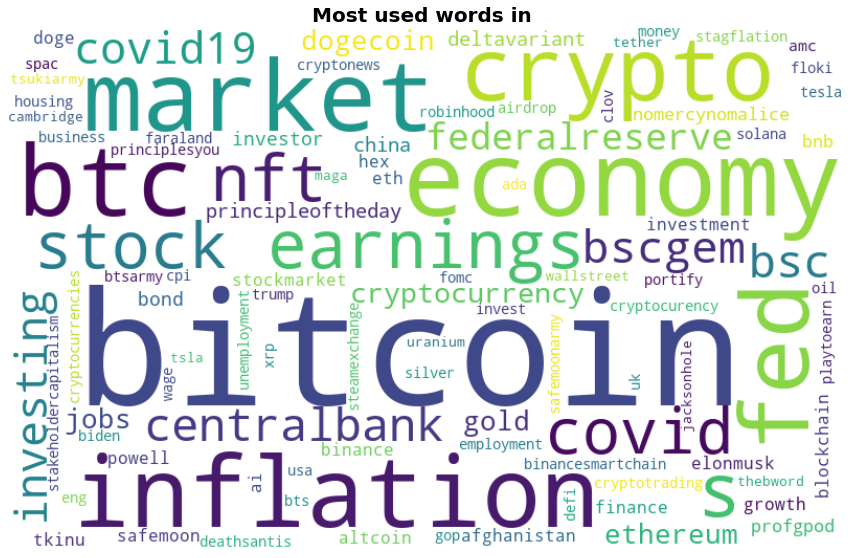

In [83]:
wordcloud_func(hashtag, Stop_Words = [''], Twitter_Icon = False, feature_name = '', if_save = False)

In [78]:
# wordcloud_func(hashtag, Stop_Words = [''], Twitter_Icon = True, feature_name = 'Hashtag', if_save = True)

<font size = 4><b><center><a id="section3.2">3.2 symbol</a>

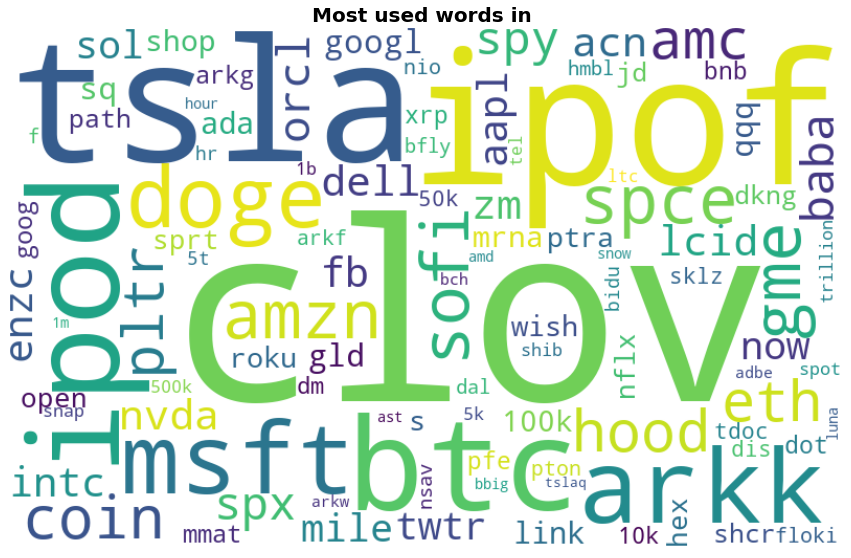

In [79]:
wordcloud_func(symbol, Stop_Words = [''], Twitter_Icon = False, feature_name = '', if_save = False)

<font size = 4><b><center><a id="section3.3">3.3 Hashtag and Symbol</a>

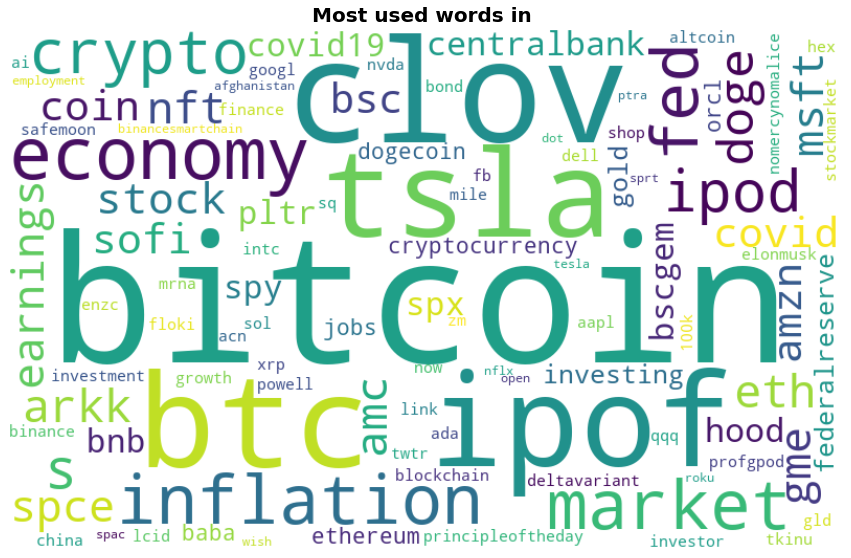

In [80]:
hash_sym = hashtag + ' ' + symbol
wordcloud_func(hash_sym, Stop_Words = [''], Twitter_Icon = False, feature_name = '', if_save = False)

<font size = 4><b><center><a id="section3.4">3.4 Clean Text</a>

In [321]:
clean_text_all = [x for j in df.clean_text for x in j]

In [322]:
clean_text_string = ' '.join(clean_text_all)

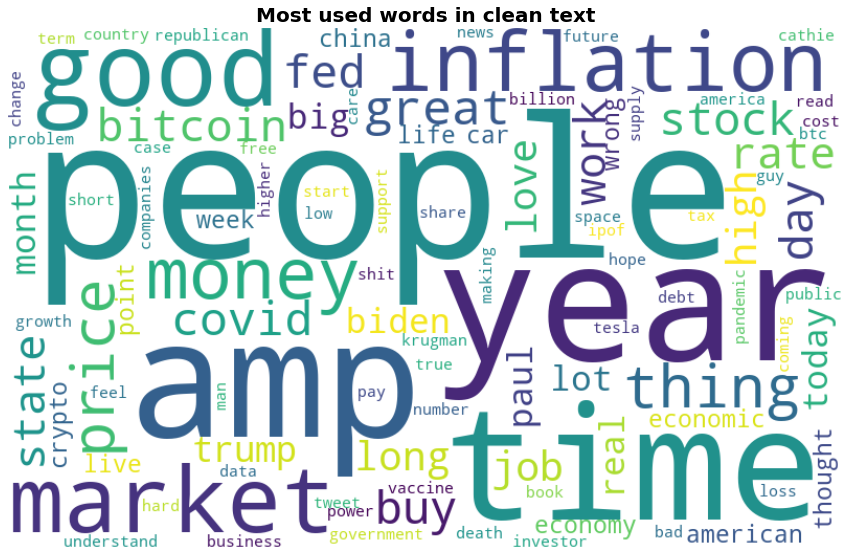

In [323]:
wordcloud_func(clean_text_string, Stop_Words = ['year', 'time', 'good', 'people', 'amp', 'thing', 'bad', 'lot', 'day',
                                               'today', 'understand', 'number', 'great', 'real', 'coming', 'true', 'love',
                                               'live', 'shit', 'ago', 'big','making','human', 'man', 'hope', 'week',
                                               'things', 'happened', 'point', 'wrong', 'work', 'feel', 'month','guy',
                                               'care', 'fact', 'nice', 'life', 'guys', 'reason','start','post', 'thought',
                                               'talk', 'months','happen', 'buying', 'higher', 'friend', 'years', 'person',
                                               ],
               Twitter_Icon = False, feature_name = 'clean text', if_save = False)

In [223]:
# # delete some words that frequently shows but useless according from wordcloud 
# Useless_Words_wc = ['year', 'time', 'good', 'people', 'amp', 'thing', 'bad', 'lot', 'day',
#                     'today', 'understand', 'number', 'great', 'real', 'coming', 'true', 'love',
#                     'live', 'shit', 'ago', 'big','making','human', 'man', 'hope', 'week',
#                     'things', 'happened', 'point', 'wrong', 'work', 'feel', 'month','guy',
#                     'care', 'fact', 'nice', 'life', 'guys', 'reason','start','post', 'thought',
#                     'talk', 'months','happen', 'buying', 'higher', 'friend', 'years', 'person',
#                                                ]

In [ ]:
# def remove_useless_words(text):
#     text = [w for w in text if not w in list(Useless_Words_wc)] #remove stopwords
#     return text

# df['clean_text2'] = df.clean_text.apply(remove_useless_words)

<font size = 5><b><center><a id="section4">4. Sentiment analysis</a>

<font size = 4><b><center><a id="section4.1">4.1 Vader</a>

<font color='##4682B4' size = 3>NLTK’s Vader sentiment analysis tool uses a bag of words approach (a lookup table of positive and negative words) with some simple heuristics (e.g. increasing the intensity of the sentiment if some words like “really”, “so” or “a bit” are present).</font>

<font color='##4682B4' size = 3>The advantage of this approach is that sentences containing negated positive words (e.g. “not happy”, “not good”) will still receive a negative sentence sentiment (thanks to the heuristics to flip the sentiment of the word following a negation).</font>

<font color='##4682B4' size = 3>The disadvantage of this approach is that Out of Vocab (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).</font>

In [120]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [121]:
def hand_annoate_vader(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        scores = sid.polarity_scores(text)
        print(text)
        print(scores)
        print("-"*110)

In [122]:
hand_annoate_vader(df, 6, 10,'text')

@charliebilello Kinda gross that $UNI is down less from ATH than $LINK

Even after the heist which exposed how vulnerable Uniswap is.

Unicorns ngmi
{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.6133}
--------------------------------------------------------------------------------------------------------------
@charliebilello Not a store of value, not a currency, not much remains standing in the crypto bubble.
{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.2584}
--------------------------------------------------------------------------------------------------------------
@charliebilello Put up Sciacoin $SC
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
--------------------------------------------------------------------------------------------------------------
@charliebilello @RemindMe_OfThis 1 month
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
-----------------------------------------------------------------------------------------------------------

In [123]:
def time_vader(df, rows, column):
    from timeit import default_timer as timer        
    start = timer()
    for i in range(rows):
        text = df.loc[i, column]
        scores = sid.polarity_scores(text)
    end = timer()
    time = end - start
    print("For model vader, it takes " + str(time) +"s to process " + str(rows) + " rows")

In [124]:
time_vader(df, 10000, 'text')

For model vader, it takes 2.4785053999999036s to process 10000 rows


<font size = 4><b><center><a id="section4.2">4.2 Textblob</a>

In [125]:
#pip install textblob

In [126]:
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import TextBlob

In [127]:
def hand_annoate_textblob(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        scores = TextBlob(text).sentiment
        print(text)
        print(scores)
        print("-"*110)

In [128]:
hand_annoate_textblob(df, 6, 10,'text')

@charliebilello Kinda gross that $UNI is down less from ATH than $LINK

Even after the heist which exposed how vulnerable Uniswap is.

Unicorns ngmi
Sentiment(polarity=-0.20555555555555555, subjectivity=0.2138888888888889)
--------------------------------------------------------------------------------------------------------------
@charliebilello Not a store of value, not a currency, not much remains standing in the crypto bubble.
Sentiment(polarity=-0.1, subjectivity=0.2)
--------------------------------------------------------------------------------------------------------------
@charliebilello Put up Sciacoin $SC
Sentiment(polarity=0.0, subjectivity=0.0)
--------------------------------------------------------------------------------------------------------------
@charliebilello @RemindMe_OfThis 1 month
Sentiment(polarity=0.0, subjectivity=0.0)
--------------------------------------------------------------------------------------------------------------
@charliebilello @Deals4We H

In [129]:
def time_textblob(df, rows, column):
    from timeit import default_timer as timer        
    start = timer()
    for i in range(rows):
        text = df.loc[i, column]
        scores = TextBlob(text).sentiment
    end = timer()
    time = end - start
    print("For model textblob, it takes " + str(time) +"s to process " + str(rows) + " rows")

In [130]:
time_textblob(df, 10000,'text')

For model textblob, it takes 2.6331913000003624s to process 10000 rows


<font size = 4><b><center><a id="section4.3">4.3 Flair</a>

In [131]:
#pip install flair

In [132]:
from flair.models import TextClassifier
from flair.data import Sentence
import flair
classifier = TextClassifier.load('en-sentiment')

2021-10-24 21:54:53,453 loading file C:\Users\Jingwen\.flair\models\sentiment-en-mix-distillbert_4.pt


In [133]:
def hand_annoate_flair(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        flair_text = flair.data.Sentence(text)
        classifier.predict(flair_text)
        # make score in negative sentiment less than, match up with previous sentiment rules
        if flair_text.labels[0].value == "NEGATIVE":
            flair_score = -1 * flair_text.labels[0].score
        else:
            flair_score = flair_text.labels[0].score
        print(text)
        print(flair_score)
        print("-"*110)

In [134]:
hand_annoate_flair(df, 6, 10,'text')

@charliebilello Kinda gross that $UNI is down less from ATH than $LINK

Even after the heist which exposed how vulnerable Uniswap is.

Unicorns ngmi
-0.9995381832122803
--------------------------------------------------------------------------------------------------------------
@charliebilello Not a store of value, not a currency, not much remains standing in the crypto bubble.
-0.9998775720596313
--------------------------------------------------------------------------------------------------------------
@charliebilello Put up Sciacoin $SC
-0.900278627872467
--------------------------------------------------------------------------------------------------------------
@charliebilello @RemindMe_OfThis 1 month
-0.9844755530357361
--------------------------------------------------------------------------------------------------------------
@charliebilello @Deals4We Hello Guys, we have built a specialised job board for the Crypto and Blockchain Industry, if you are looking for a new care

<font size = 4><b><center><a id="section4.4">4.4 Sentiment packages comparison, correlation, and distribution</a>

In [135]:
def sentiment_comp(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        print(text)
        
        ############### VADER ###############
        vader_scores = sid.polarity_scores(text).get('compound') #vader returns a dict, we only need the compound scores
        vader_scores = round(vader_scores,3)
        print("\nVader score is " + str(vader_scores) + "\n")
        
        ############### TEXTBLOB ###############
        textblob_score = TextBlob(text).sentiment
        textblob_polarity = round(textblob_score.polarity,3) # round to 3 decimals
        textblob_subjectivity = round(textblob_score.subjectivity,3)
        print("TextBlob polarity is " + str(textblob_polarity) + ", subjectivity is " + str(textblob_subjectivity) + "\n")
        
        ################ FLAIR ################
        flair_text = flair.data.Sentence(text)
        classifier.predict(flair_text)
        
        # make score in negative sentiment less than, match up with previous sentiment rules
        if flair_text.labels[0].value == "NEGATIVE":
            flair_score = round(-1 * flair_text.labels[0].score,3)
        else:
            flair_score = round(flair_text.labels[0].score,3)
        
        print("Flair score is " + str(flair_score) + "\n")
        print("-"*110)

In [136]:
sentiment_comp(df, 111, 123,'text')

@charliebilello But only @GameXOfficial1 all I see is green candles #GMX $GMX

Vader score is 0.0

TextBlob polarity is -0.1, subjectivity is 0.65

Flair score is -0.996

--------------------------------------------------------------------------------------------------------------
@charliebilello 💎JOIN THE RISING STAR OF NFT GAME IN THE SPACE💎 AIRDROPS OF 38 NFT from the developers of the new crypto games. @CrazyCyberBunny

Website:https://t.co/cCb057ElyL
Telegram:https://t.co/YNpJYpIvWl
Discord: https://t.co/k65nYQ5hQD
Crazy CybΞr Bunny (@CrazyCyberBunny)

Vader score is -0.625

TextBlob polarity is -0.288, subjectivity is 0.585

Flair score is 0.997

--------------------------------------------------------------------------------------------------------------
@charliebilello Thanks for reminding me

Vader score is 0.44

TextBlob polarity is 0.2, subjectivity is 0.2

Flair score is 0.813

-------------------------------------------------------------------------------------------------

<font color='##4682B4' size = 3> Sentiment analysis works better with orignal text. The cleaning process for sentiment analysis is abandoned</font> 

<font color='##4682B4' size = 3> Get sentiment for each text</font> 

In [141]:
from time import time

In [142]:
start = time()
df['TextBlob_Sentiment'] = df.text.apply(lambda x:TextBlob(x).sentiment.polarity)
end = time()
result = end - start
print('%.3f seconds' % result) # Report execution time

25.973 seconds


In [144]:
start = time()
df['Vader_Sentiment'] = df.text.apply(lambda x:sid.polarity_scores(x)['compound'])
end = time()
result = end - start
print('%.3f seconds' % result) # Report execution time

25.403 seconds


In [145]:
def flair_sa(text):
    flair_text = Sentence(text)
    classifier.predict(flair_text)
    # make score in negative sentiment less than, match up with previous sentiment rules
    if flair_text.labels[0].value == "NEGATIVE":
        return -1 * flair_text.labels[0].score
    else:
        return flair_text.labels[0].score

In [146]:
start = time()
df['Flair_Sentiment'] = df.text.apply(lambda x:flair_sa(x))
end = time()
result = end - start
print('%.3f seconds' % result) # Report execution time

1170.104 seconds


<font color='##4682B4' size = 3.5> Distribution</font> 

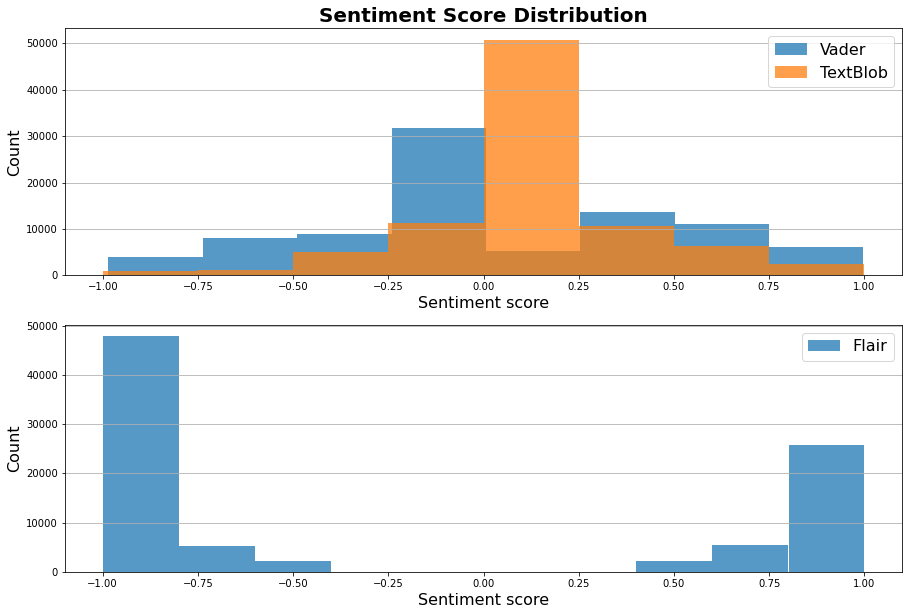

In [160]:
fig, ax = plt.subplots(2,1,figsize = (15,10))

ax[0].hist(df['Vader_Sentiment'], bins= 8, alpha=0.75, label = 'Vader')
ax[0].hist(df['TextBlob_Sentiment'], bins= 8, alpha=0.75, label = 'TextBlob')
ax[0].set_title('Sentiment Score Distribution',fontsize = 20, fontweight ='bold')
ax[0].grid(axis='y')
ax[0].set_xlabel("Sentiment score", fontsize = 16)
ax[0].set_ylabel("Count",fontsize = 16)
ax[0].legend(prop={'size': 16})

ax[1].hist(df['Flair_Sentiment'], bins= 10, rwidth=0.99, alpha=0.75, label = 'Flair')
ax[1].grid(axis='y')
ax[1].set_xlabel("Sentiment score", fontsize = 16)
ax[1].set_ylabel("Count",fontsize = 16)
ax[1].legend(prop={'size': 16})

# fig.savefig("Sentiment_distribution", bbox_inches="tight")
plt.show()

<font color='##4682B4' size = 3> Get daily average sentiment</font> 

In [154]:
df_sa = df.groupby(['Date']).mean()
df_sa = df_sa.reset_index()

In [156]:
Sentiment_corr = pd.concat([df_sa['Vader_Sentiment'],df_sa['TextBlob_Sentiment'], df_sa['Flair_Sentiment'],df_time_series['tweets_Count']], axis=1)

<font color='##4682B4' size = 3.5> Correlation ( of above daily average data)</font> 

In [157]:
correlation_mat = Sentiment_corr.corr()
correlation_mat

,Vader_Sentiment,TextBlob_Sentiment,Flair_Sentiment,tweets_Count
Vader_Sentiment,1.000000,0.825131,0.754487,-0.486764
TextBlob_Sentiment,0.825131,1.000000,0.621677,-0.634808
Flair_Sentiment,0.754487,0.621677,1.000000,-0.286399
tweets_Count,-0.486764,-0.634808,-0.286399,1.000000


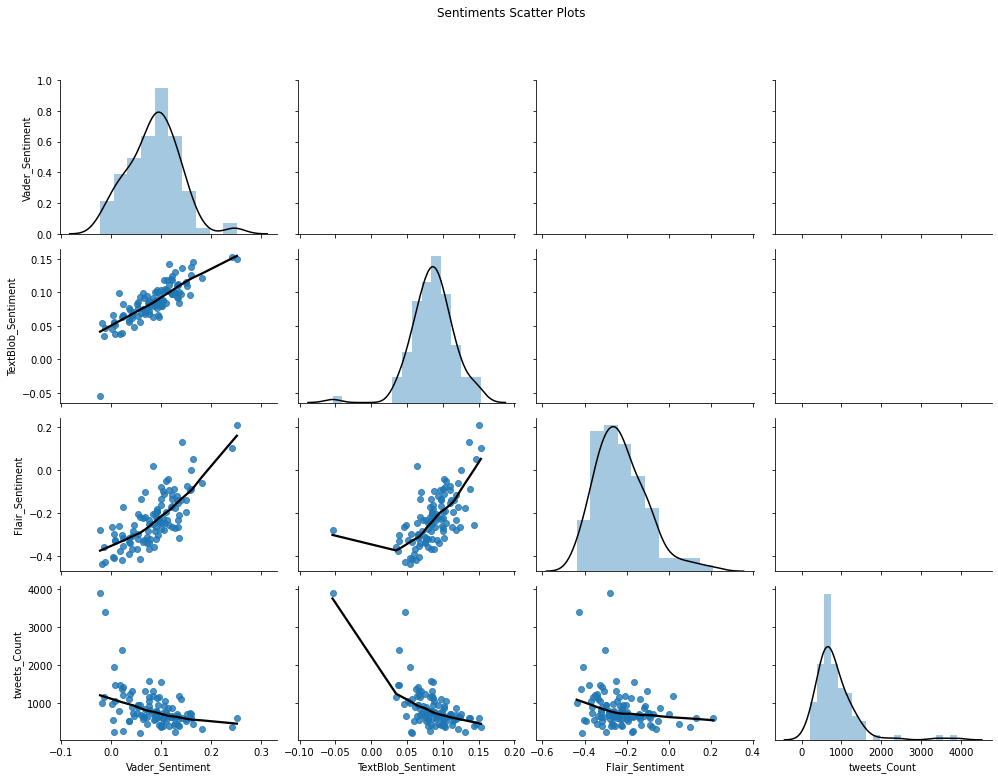

<Figure size 432x288 with 0 Axes>

In [158]:
import seaborn as sns
g = sns.PairGrid(Sentiment_corr, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'}) #lower triangle
g.map_diag(sns.distplot, kde_kws={'color': 'black'}) #diagonal

#title:
g.fig.suptitle('Sentiments Scatter Plots', y=1.08)

plt.show()
plt.cla()
plt.clf()

<font size = 4><b><center><a id="section4.6">4.6 Time series of sentiment analysis</a>

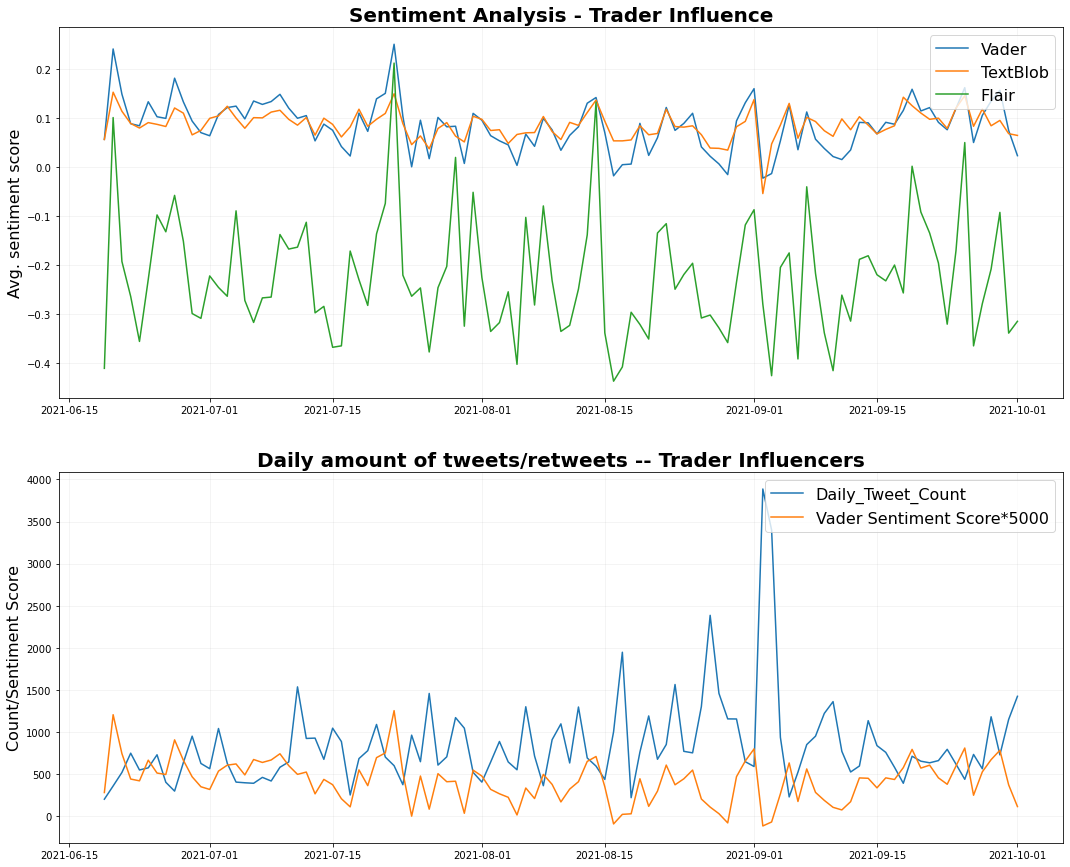

In [169]:
fig, ax = plt.subplots(2,1,figsize = (18,15))

ax[0].plot(df_sa['Date'], df_sa['Vader_Sentiment'],'-',markersize=2, label='Vader')
ax[0].plot(df_sa['Date'], df_sa['TextBlob_Sentiment'],'-',markersize=2, label='TextBlob')
ax[0].plot(df_sa['Date'], df_sa['Flair_Sentiment'],'-',markersize=2, label='Flair')
ax[0].grid(color = 'grey', alpha =0.1)
ax[0].set_title(('Sentiment Analysis - Trader Influence'),fontweight ='bold', fontsize = 20)
ax[0].set_ylabel(('Avg. sentiment score'), fontsize = 16)
ax[0].legend(prop={'size': 16},loc='upper right')

ax[1].plot(df_time_series['Date'], df_time_series['tweets_Count'],'-',markersize=2, label='Daily_Tweet_Count')
ax[1].plot(df_sa['Date'], df_sa['Vader_Sentiment']*5000,'-',markersize=2, label='Vader Sentiment Score*5000')
# ax[1].plot(df['Date'], df_time_series['retweet_count'],'-',markersize=2, label='Daily_Retweet_count')
ax[1].grid(color = 'grey', alpha =0.1)
ax[1].set_title(('Daily amount of tweets/retweets -- Trader Influencers'),fontweight ='bold', fontsize = 20)
ax[1].set_ylabel(('Count/Sentiment Score'), fontsize = 16)
ax[1].legend(prop={'size': 16}, loc='upper right')

fig.savefig("Sentiment_Time_Series", bbox_inches="tight")
plt.show() 

<font size = 5><b><center><a id="section5">5. LDA</a>

<font color='##4682B4' size = 3> will filter dataframe for 7 days</font> 

In [242]:
max_days_ago = 7

#filter dates 
latest_date= max(df.Date)

earliest_date = latest_date - datetime.timedelta(days=max_days_ago)

earliest_date

datetime.date(2021, 9, 24)

In [244]:
#filter for 7 days 
df_lda = df[df['Date'] >= earliest_date]
len(df_lda)

6856

<font size = 4><b><center><a id="section5.2">5.1 Lemmatization</a>

In [292]:
import spacy, gensim, nltk

In [293]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [294]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [299]:
# Do lemmatization keeping only Noun
data_lemmatized = lemmatization(df_lda.clean_text.to_list(), allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['long', '']


In [316]:
def process_text(data: list, ngrams: str) -> list:
    '''
    Input:
        data: list of strings
    Output:
        perform text transformation and return list of processed strings
    '''
    
    # split text strings into tokens
    data = [doc.split() for doc in data]

    # form n-grams
    if ngrams == "freq":
        bigram_mod = preprocessing.build_bigram_models(data)  # using corpus with no retweets.
        data_words_ngrams = preprocessing.make_freq_bigrams(data, bigram_mod)
    elif ngrams == "bi":
        data_words_ngrams = list(map(all_bigrams, data))
    elif ngrams == "tri":
        data_words_ngrams = list(map(all_trigrams, data))
    else:
        data_words_ngrams = data

    return [' '.join(doc) for doc in data_words_ngrams]  # join tokens in each doc to make a list of strings


In [317]:
bbb= process_text(data_lemmatized, 'freq')

<font color='##4682B4' size = 3> wordcloud for lemmatized text</font> 

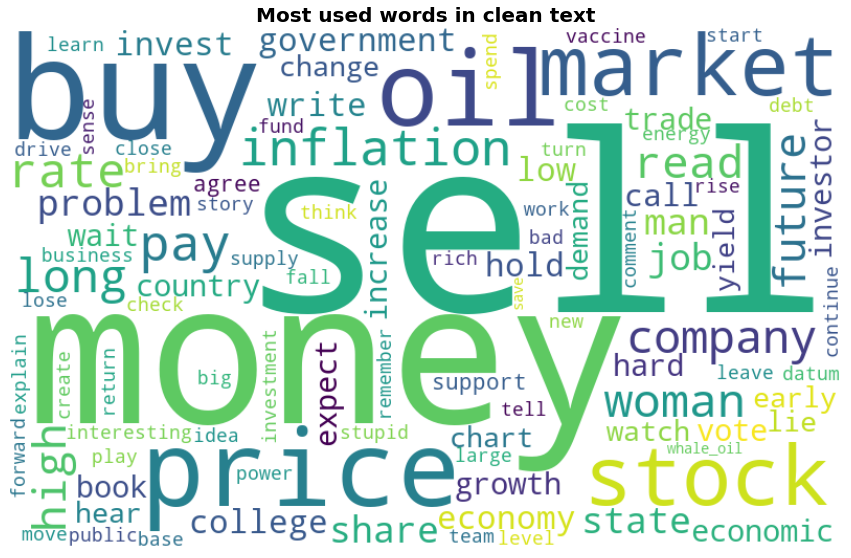

In [320]:
bbb = ' '.join(bbb)
wordcloud_func(bbb, Stop_Words = [''],
               Twitter_Icon = False, feature_name = 'clean text', if_save = False)

<font size = 4><b><center><a id="section5.2">5.2 LDA</a>

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [ ]:
import pyLDAvis
import pyLDAvis.gensim #note, in newer versions of pyLDAvis, this is pyLDAvis.gensim_models

<font size = 5><b><center><a id="section6">6. Affect Analysis (extra)</a>

In [379]:
from empath import Empath #this is a free alternative to LIWC 

#for filtering on datetimes 
from datetime import datetime, timedelta
import pytz #for managing time zones in datetime objects 
utc=pytz.UTC

In [380]:
lexicon = Empath() #initialize object

In [381]:
liwc_categories = ['positive_emotion','negative_emotion' ,'sadness','anger','achievement','religion','work','home','money','health','sexual','death']

In [382]:
def get_all_empath_categories():
    return list(lexicon.analyze("sample text").keys())

In [383]:
all_categories = get_all_empath_categories()
print(len(all_categories))

194


In [423]:
lexicon.analyze("I love red color", categories=["colors"], tokenizer="default", normalize=False)

{'colors': 0.0}

In [395]:
lexicon.analyze("too expensive", categories=["money"], tokenizer="default", normalize=False)

{'money': 1.0}

In [433]:
def filter_date(df, date_col='created_at', end_time='',duration=''):
    
    ## filter dataframe for the specified time frame 
    if not end_time: #if no date is specified, start from the latest collected tweet 
        end_time = df[date_col].max()

    if not duration: 
        duration = end_time - df[date_col].min() #from the first collected tweet to the end of collection 
        
    #set start time by duration 
    start_time = end_time - duration

    #filter dataframe for time frame 
    df_time_window = df[(df[date_col] >= start_time) & (df[date_col] <= end_time)].copy()
    
    return df_time_window 

def liwc(text, categories=liwc_categories):
    #apply lexicon to each tweet text 
    
    if isinstance(text,str): #if this tweet has any clean_text
        #get emotions counts  
        res = lexicon.analyze(text, categories=categories, tokenizer="default", normalize=False)
        #total word count in this tweet:
        res['word_count'] = len(text.split())
    else:
        res = dict.fromkeys(categories, 0) #dictionary of 0s using all the column names from previous tweet
        res['word_count'] = 0
            
    return res

In [434]:
#with liwc categories 
def get_df_liwc(df, text_col='clean_text', date_col='created_at', end_time='',duration='', categories=liwc_categories):

    #filter dates 
    df_filtered = filter_date(df, date_col=date_col, end_time=end_time, duration=duration)
    
    #apply liwc dictionary to tweets 
    ser_of_dicts = df_filtered[text_col].apply(lambda x: liwc(x,categories=categories)) #returns a series of dictionaries with category:count pairs. 
    #convert the result to dataframe 
    df_liwc = ser_of_dicts.apply(pd.Series) #makes output into a dataframe 
    
    #add datetime as index to new liwc dataframe 
    df_liwc = df_filtered[[date_col]].join(df_liwc) #left join on index 
    df_liwc.set_index(date_col, inplace=True) #make the creation datetime the index 
    df_liwc.sort_index(inplace=True) #sort tweets in ascending date order 
    
    return df_liwc

In [435]:
%%time
df_liwc = get_df_liwc(df,categories=all_categories)

Wall time: 10min 50s


In [436]:
df_liwc.sum(axis=0).sort_values(ascending=False)

word_count      655470.0
economics        32154.0
money            26174.0
business         23835.0
valuable         18932.0
                  ...   
irritability       444.0
exotic             443.0
exasperation       432.0
superhero          420.0
anonymity          190.0
Length: 195, dtype: float64

In [527]:
pd.DataFrame(df_liwc.sum(axis=0).sort_values(ascending=False), columns = ['Count'])[:10]

,Count
word_count,655470.0
economics,32154.0
money,26174.0
business,23835.0
valuable,18932.0
negative_emotion,18864.0
payment,18141.0
banking,18048.0
communication,16014.0
shopping,15824.0


In [468]:
def plot_timeseries(df, freq_str='6H', ncol=3, ignore=[], normalize=False): 
    #df is dataframe of word/emotion counts 
    #if normalize is True, the plot is the rolling average of % of each tweet. If False, the plot is a rolling sum of emotional word counts 
    
    ## Bin dataframe by frequency 
    #resampling string id's: 
    # Month, Week, Day, Hour, Minute, Seconds: [#]M, [#]W, [#]D,[#]H,[#]T,[#]S 
    ts = df.resample(freq_str).sum().copy()

    ## Normalize each emotional count by the total word_count 
    if normalize: 
        ts = ts.div(ts.word_count, axis=0) #element-wise divide each column by the total word_count 
    
    ## Remove irrelevant columns 
    #remove word_count from dataframe 
    if 'word_count' not in ignore:
        ignore.append('word_count')
    #remove all irrlevant columns by name 
    for colname in ignore:
        if colname in ts.columns:
            del ts[colname]
    
    ## Rolling 
    if normalize: #if values are normalized by word_count, then plot needs to be rolling average 
        ts = ts.rolling(1).apply(np.mean)
    else: 
        ts = ts.rolling(1).apply(sum)  #rolling() aggregates by ## of records 

    ## Plot 
    ts.plot(figsize=(10,6), alpha =0.9,markersize=1 ) #options: steps, steps-post,  steps-mid, steps-pre
    plt.legend(bbox_to_anchor=(1.0, 1.0), ncol=ncol)
    plt.ylabel('% of word count') if normalize else plt.ylabel('word count')
    plt.show()

In [464]:
#choose the size of the bin. freq_str = Month, Week, Day, Hour, Minute, Seconds: [#]M, [#]W, [#]D,[#]H,[#]T,[#]S 

In [465]:
cat_list = df_liwc.sum(axis=0).sort_values(ascending=False).index[:11].to_list()

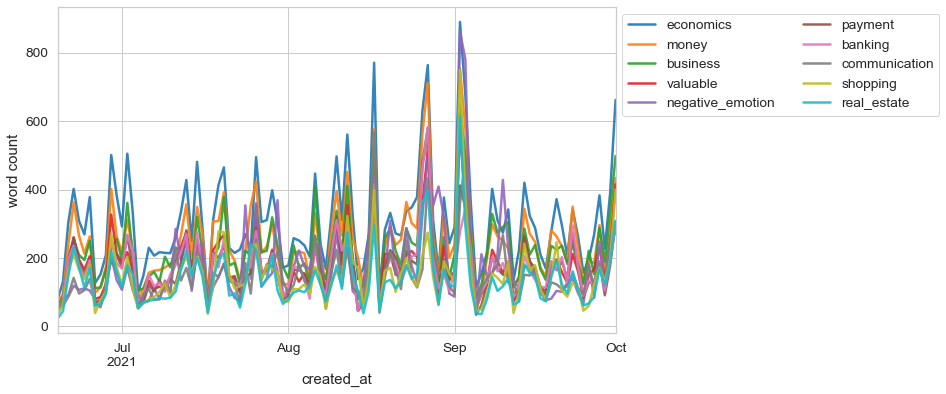

In [469]:
plot_timeseries(df_liwc[cat_list], freq_str='D', ncol=2, ignore=[], normalize=False)